# PRÁCTICA 2
# PROCESOS AR Y DENSIDAD ESPECTRAL DE POTENCIA
___

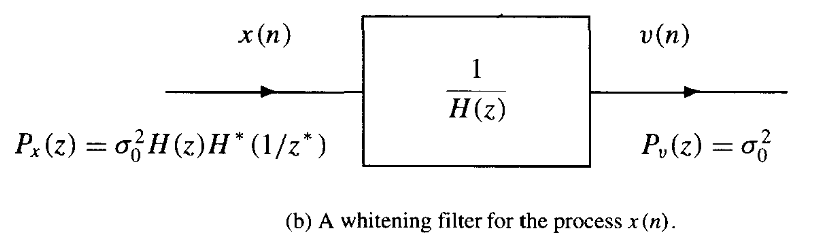

Considérese el siguiente proceso $AR(2)$:

$$
x(n) = -a_1 x(n-1) - a_2 x(n-2) + v(n)
$$

donde $v(n)$ es un ruido blanco de media nula y varianza $\sigma_v^2 = 1$, y: $a_1=0$, $a_2=0.81$, $b_0=1$. Se pide resolver las siguientes cuestiones:
___
# EJERCICIO 1 
___
**Obtener y dibujar la autocorrelación** $r_x(k)$, para:

   $$
   k = -(N - 1), \dots, N - 1; \quad N = 32
   $$

   y el **espectro** $P_x(\omega)$ originado por el proceso $AR(2)$. La autocorrelación deberá deducirse de las **ecuaciones de Yule-Walker**, y el espectro a partir de la expresión analítica correspondiente:

   $$
   \hat{P}_x(\omega) = \frac{\sigma_v^2}{\left|1 + a_1 e^{-j\omega} + a_2 e^{-j2\omega} \right|^2} = \frac{\sigma_v^2}{\left|\mathcal{F}[a_k]\right|^2} \tag{4}
   $$


### Ecuaciones Yule-Walker

Consideramos un proceso autoregresivo de orden 2 $AR(2)$ descrito por la ecuación:

$$
x(n) + a_1 x(n-1) + a_2 x(n-2) = v(n)
$$

donde $v(n)$ es un ruido blanco con media nula y varianza $\sigma_v^2$. Las ecuaciones de Yule-Walker para un proceso AR(2), para $k \geq 0$, son:

\begin{cases}
r_x(0) + a_1 r_x(1) + a_2 r_x(2) = \sigma_v^2 \\
r_x(k) + a_1 r_x(k-1) + a_2 r_x(k-2) = 0 \quad \text{para } k > 0
\end{cases}

En nuestro caso: $\sigma_v^2 = 1$, $a_1 = 0$, $a_2 = 0.81$

- Para $k = 0$: $\qquad r_x(0) + 0.81 \cdot r_x(2) = 1 $

- Para $k = 1$: $\qquad r_x(1) + 0.81 \cdot r_x(-1) = 0$

Como la autocorrelación es una función par: $r_x(-1) = r_x(1)$, se obtiene: $\qquad r_x(1)(1 + 0.81) = 0 \Rightarrow r_x(1) = 0$


- Para $k = 2$: $\qquad r_x(2) + 0.81 \cdot r_x(0) = 0 \Rightarrow r_x(2) = -0.81 \cdot r_x(0)$

Sustituyendo en la ecuación de $k = 0$:

\begin{align}
r_x(0) + 0.81(-0.81 \cdot r_x(0)) &= 1 \\
r_x(0)(1 - 0.81^2) &= 1 \\
r_x(0) &= \frac{1}{1 - 0.6561} = \frac{1}{0.3439} \approx 2.907
\end{align}

Entonces, sustituyendo, $r_x(1) = 0 $ y $r_x(2) = -0.81 \cdot 2.907 \approx -2.354$

- Para $k > 2$, la autocorrelación se obtiene por la ecuación recursiva:

$$
r_x(k) = -a_1 r_x(k-1) - a_2 r_x(k-2)
$$

- Para $k < 0$, se usa:

$$
r_x(-k) = r_x(k)
$$



### Espectro de potencia $P_x(\omega)$

La función de densidad espectral de potencia para un proceso $AR(2)$ es:

$$
P_x(\omega) = \frac{\sigma_v^2}{|1 + a_1 e^{-j\omega} + a_2 e^{-j2\omega}|^2} = P_x(\omega) = \frac{1}{|1 + 0.81 e^{-j2\omega}|^2}
$$

Este espectro se puede evaluar numéricamente para $\omega \in [-\pi, \pi]$ y graficar para visualizar cómo se distribuye la energía del proceso en frecuencia.


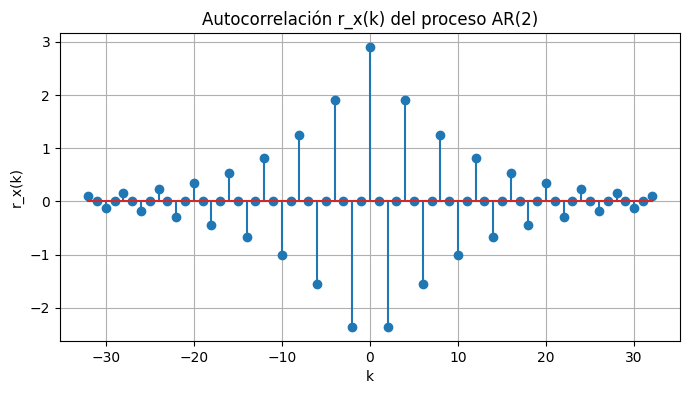

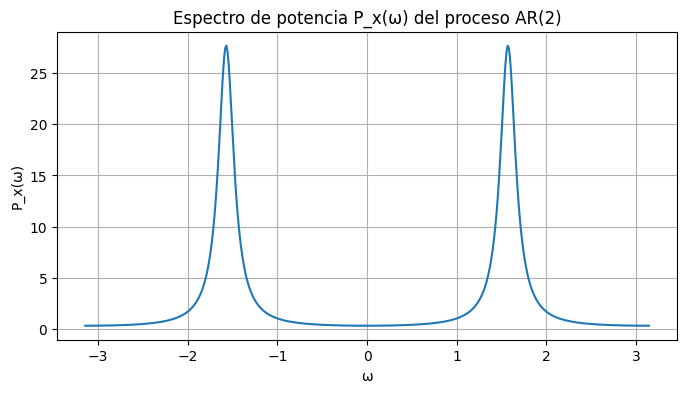

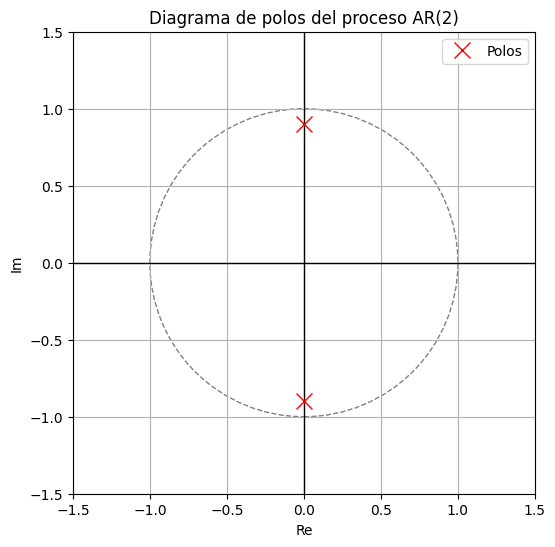

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#* ---------------------------------------------
#* Parametros del proceso AR(2)
#* ---------------------------------------------
a1 = 0.0
a2 = 0.81
sigma_v2 = 1.0  # Varianza del ruido v(n)
N = 32          # Rango para la autocorrelacion: -N,...,N

#* ---------------------------------------------
#* Calculo de r_x(0), r_x(1) y r_x(2) usando Yule-Walker
#* ---------------------------------------------
# De las ecuaciones:
#?   r_x(0) + a1*r_x(1) + a2*r_x(2) = sigma_v2
#?   r_x(1) + a1*r_x(0) + a2*r_x(1) = 0         -> r_x(1) = 0
#?   r_x(2) + a1*r_x(1) + a2*r_x(0) = 0         -> r_x(2) = -a2*r_x(0)

# Formamos el sistema de ecuaciones
#   [1 a1 a2] [r_x(0)] = [sigma_v2]
#   [a1 1 a1] [r_x(1)] = [0]
#   [a2 a1 1] [r_x(2)] = [0]
#
a123 = np.array([[1, a1, a2], [a1, 1, a1], [a2, a1, 1]])
b123 = np.array([sigma_v2, 0, 0])
r012 = np.linalg.solve(a123, b123) # Resolvemos el sistema

r0 = r012[0] # r_x(0)
r1 = r012[1] # r_x(1)
r2 = r012[2] # r_x(2)
 
#* ---------------------------------------------
#* Generar r_x(k) para k = 0,...,N usando la recurrencia
#*    r_x(k) = -a1*r_x(k-1) - a2*r_x(k-2)
#* ---------------------------------------------
r_pos = np.zeros(N+1)  # r_pos[k] almacenara r_x(k) para k>=0
r_pos[0] = r0
if N >= 1:
    r_pos[1] = r1
if N >= 2:
    r_pos[2] = r2
for k in range(3, N+1):
    r_pos[k] = -a1*r_pos[k-1] - a2*r_pos[k-2]

# Ahora construimos r_x(k) completo para k = -N..N
r_full = np.zeros(2*N+1)
# Indice 0 corresponde a k=-N, y el indice N corresponde a k=0, etc.
for k in range(-N, N+1):
    if k < 0:
        r_full[k+N] = r_pos[-k] # r_x(k) = r_x(-k)
    else:
        r_full[k+N] = r_pos[k]

#* ---------------------------------------------
#* Graficar la autocorrelacion
#* ---------------------------------------------
k_vals = np.arange(-N, N+1)
plt.figure(figsize=(8,4))
plt.stem(k_vals, r_full)
plt.title('Autocorrelación r_x(k) del proceso AR(2)')
plt.xlabel('k')
plt.ylabel('r_x(k)')
plt.grid(True)
plt.show()

#* ---------------------------------------------
#* Espectro de potencia P_x(ω)
#*    P_x(ω) = sigma_v^2 / |1 + a1 e^{-jω} + a2 e^{-j2ω}|^2
#* ---------------------------------------------
# Evaluamos para w en [-pi, pi]
w = np.linspace(-np.pi, np.pi, 512)
# Numerador = sigma_v^2 = 1
# Denominador = |1 + a1 e^{-j w} + a2 e^{-j 2w}|^2, En nuestro caso: 1 + 0.81*e^{-j 2w}
P_x = []
for omega in w:
    H = 1.0 + a2 * np.exp(-1j * 2.0 * omega)
    P_x.append(1.0 / np.abs(H)**2) # Append introduces a new element at the end of the list

P_x = np.array(P_x)

# Graficamos el espectro
plt.figure(figsize=(8,4))
plt.plot(w, P_x)
plt.title('Espectro de potencia P_x(ω) del proceso AR(2)')
plt.xlabel('ω')
plt.ylabel('P_x(ω)')
plt.grid(True)
plt.show()

#* ---------------------------------------------
#* Diagrama de polos y ceros
#*    Denominador de H(z) = 1 + a1*z + a2*z^2
#* ---------------------------------------------
den = [1, a1, a2]  # z^2 + a1*z + a2
poles = np.roots(den) # Calcular raíces del polinomio: los polos

# Crear la figura
fig, ax = plt.subplots(figsize=(6,6))
# Dibujar círculo unidad
unit_circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
ax.add_artist(unit_circle)
# Dibujar ejes
ax.axhline(0, color='black', linewidth=1)
ax.axvline(0, color='black', linewidth=1)
# Dibujar polos (con una 'x')
ax.plot(np.real(poles), np.imag(poles), 'rx', markersize=12, label='Polos')
# Configurar el gráfico
ax.set_title('Diagrama de polos del proceso AR(2)')
ax.set_xlabel('Re')
ax.set_ylabel('Im')
ax.set_aspect('equal')
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.grid(True)
ax.legend()
plt.show()


___
# EJERCICIO 2
___
En lo sucesivo trabajaremos sobre una realización (señal) del proceso $AR(2)$ definido anteriormente con una duración $N = 32$.

Para ello, generaremos **1000 muestras del proceso $AR(2)$** filtrando (comando `filter` en **Matlab**, o `lfilter` de `scipy.signal` en **Python**) **ruido blanco Gaussiano**, y nos quedaremos con la señal de salida correspondiente a las **$N = 32$ últimas muestras** (para evitar el periodo transitorio inicial en el filtrado).
